In [1]:
import cv2
input_image = cv2.imread("1 no.jpeg")

In [2]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

In [3]:
tophat_img = cv2.morphologyEx(input_image, 
                              cv2.MORPH_TOPHAT,
                              kernel)

In [4]:
cv2.imshow("original", input_image)
cv2.imshow("tophat", tophat_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
blackhat_img = cv2.morphologyEx(input_image, 
                              cv2.MORPH_BLACKHAT,
                              kernel)

In [6]:
cv2.imshow("original", input_image)
cv2.imshow("tophat", blackhat_img)
cv2.waitKey(5000)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
final = input_image + tophat_img - blackhat_img

In [8]:
cv2.imshow("original", input_image)
cv2.imshow("final", final)
cv2.waitKey(5000)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(input_image, final)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 39.9713719097146 dB


In [10]:
import cv2
import numpy as np
img = cv2.imread("1 no.jpeg",0) # Read image

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

cv2.imshow('original', img)
cv2.imshow("SobelX  SobelY",np.hstack((sobelx,sobely)))


# cv2.imshow('original', img)
# cv2.imshow('sobelx', sobelx)
# cv2.imshow('sobely', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [18]:
print(type(sobelx), type(sobely))
print(sobelx.shape, sobely.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630, 3) (630, 630, 3)


In [15]:
import cv2
import numpy as np
img = cv2.imread("1 no.jpeg",0) # Read image

sobelx = cv2.Sobel(final,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(final,cv2.CV_64F,0,1,ksize=5)  # y

cv2.imshow('original', img)
cv2.imshow("SobelX  SobelY",np.hstack((sobelx,sobely)))


# cv2.imshow('original', img)
# cv2.imshow('sobelx', sobelx)
# cv2.imshow('sobely', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import cv2

img = cv2.imread("1 no.jpeg") # Read image

# Setting parameter values
t_lower = 50 # Lower Threshold
t_upper = 150 # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)

cv2.imshow('original', img)
cv2.imshow('edge', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np
img = cv2.imread("1 no.jpeg",0) # Read image

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

cv2.imshow('original', img)
cv2.imshow("SobelX  SobelY",np.hstack((sobelx,sobely)))


# cv2.imshow('original', img)
# cv2.imshow('sobelx', sobelx)
# cv2.imshow('sobely', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [2]:
sobelX=Image.fromarray(sobelx)
sobelX.show()
sobelY=Image.fromarray(sobely)
sobelY.show()

NameError: name 'Image' is not defined

In [2]:
import numpy as np
from PIL import Image as im

sobelX = im.fromarray(sobelx)
sobelX = sobelX.convert("L")
sobelX.save('sobelX.png')

In [3]:
import numpy as np
from PIL import Image as im
sobelY = im.fromarray(sobely)
sobelY = sobelY.convert("L")
sobelY.save('sobelY.png')

In [11]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('sobelX.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_sobelX = np.reshape(img2,img1.shape)
eq_img_sobelX = Image.fromarray(img3_sobelX)

In [12]:
eq_img_sobelX.show()

In [13]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img_Y = Image.open('sobelY.png')
imgY = np.asarray(img_Y)
flat = imgY.flatten()
hist, bins = np.histogram(imgY,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_sobelY = np.reshape(img2,img1.shape)
eq_img_sobelY = Image.fromarray(img3_sobelY)

In [14]:
eq_img_sobelY.show()

In [15]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)
print(type(imgNP), imgNP.shape)
img = Image.open('sobelX.png')
img1 = np.asarray(img)
img_Y = Image.open('sobelY.png')
imgY = np.asarray(img_Y)
print(type(imgNP),type(img1), type(imgY))
print(imgNP.shape,img1.shape, imgY.shape)

<class 'numpy.ndarray'> (630, 630)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630) (630, 630)


In [16]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('sobelX.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_sobelX = np.reshape(img2,img1.shape)
eq_img_sobelX = Image.fromarray(img3_sobelX)

In [17]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)

img = Image.open('sobelX.png')
img1 = np.asarray(img)

print(type(imgNP), type(img1),type(img3_sobelX))
print(imgNP.shape, img1.shape, img3_sobelX.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630) (630, 630)


In [19]:
cv2.imshow('CE_sobelX', img3_sobelX)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, img1)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.723714428564403 dB


In [22]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img1, img3_sobelX)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 33.42071833636603 dB


In [24]:
import numpy as np
import pandas as pd
import cv2
img = cv2.imread("1 no.jpeg",0)
gaussBlur = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",np.hstack((img,gaussBlur)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
highPass = img - gaussBlur
# or We can use this statement to filter the high pass image
#highPass = highPass + 127*np.ones(img.shape, np.uint8)
cv2.imshow("High Pass",np.hstack((img, highPass)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
highPass.shape

(630, 630)

In [20]:
import numpy as np
from PIL import Image as im

highPass = im.fromarray(highPass)
highPass = highPass.convert("L")
highPass.save('highPass.png')

In [27]:
kernel = np.ones((10,10),np.float32)/25
lowPass = cv2.filter2D(img,-1, kernel)
lowPass = img - lowPass
cv2.imshow("Low Pass",np.hstack((img, lowPass)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
lowPass.shape

(630, 630)

In [23]:
import numpy as np
from PIL import Image as im

lowPass = im.fromarray(lowPass)
lowPass = lowPass.convert("L")
lowPass.save('lowPass.png')

In [46]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)

imgH = Image.open('highPass.png')
imgHpH = np.asarray(imgH)

imgL = Image.open('lowPass.png')
imgLpH = np.asarray(imgL)

print(type(imgNP), type(imgHpH), type(imgLpH))
print(imgNP.shape, imgHpH.shape, imgLpH.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630) (630, 630)


In [48]:
cv2.imshow("imgHpH  imgLpH",np.hstack((imgHpH,imgLpH)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, imgHpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.305280166529638 dB


In [32]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, imgLpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.952075907485913 dB


In [33]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('highPass.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_highPass = np.reshape(img2,img1.shape)
eq_img_highPass = Image.fromarray(img3_highPass)

In [34]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('lowPass.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_lowPass = np.reshape(img2,img1.shape)
eq_img_lowPass = Image.fromarray(img3_lowPass)

In [39]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)
print(type(img3_highPass), type(img3_lowPass))
print(img3_highPass.shape, img3_lowPass.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630)


In [40]:
cv2.imshow("img3_highPass  img3_lowPass",np.hstack((img3_highPass,img3_lowPass)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, img3_highPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.034337717551875 dB


In [42]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, img3_lowPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.250385222156066 dB


In [43]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNpH, img3_highPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.960703759713844 dB


In [44]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgLpH, img3_lowPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.109262800691283 dB


In [83]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('lowPass.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_lowPass = np.reshape(img2,img1.shape)
eq_img_lowPass = Image.fromarray(img3_lowPass)

In [84]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgLpH, img3_lowPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.357523278857165 dB


In [79]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, imgNpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.789033464612707 dB


In [1]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('1 no.jpeg')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3 = np.reshape(img2,img1.shape)
eq_img = Image.fromarray(img3)

In [2]:
img1.shape

(630, 630)

In [22]:
import cv2
img = Image.open('1 no.jpeg')
img1 = np.asarray(img)
cv2.imshow('',np.hstack((img1, img3)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
gaussBlur = cv2.GaussianBlur(img3,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",np.hstack((img3,gaussBlur)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
highPass = img3 - gaussBlur
# or We can use this statement to filter the high pass image
#highPass = highPass + 127*np.ones(img.shape, np.uint8)
cv2.imshow("High Pass",np.hstack((img3, highPass)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
import numpy as np
from PIL import Image as im

highPass = im.fromarray(highPass)
highPass = highPass.convert("L")
highPass.save('highPass.png')

In [24]:
kernel = np.ones((10,10),np.float32)/25
lowPass = cv2.filter2D(img3,-1, kernel)
lowPass = img3 - lowPass
cv2.imshow("Low Pass",np.hstack((img3, lowPass)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import numpy as np
from PIL import Image as im

lowPass = im.fromarray(lowPass)
lowPass = lowPass.convert("L")
lowPass.save('lowPass.png')

In [20]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)

imgH = Image.open('highPass.png')
imgNpH = np.asarray(imgH)

imgL = Image.open('lowPass.png')
imgLpH = np.asarray(imgL)

print(type(imgNP), type(imgNpH), type(imgLpH),  type(gaussBlur))
print(imgNP.shape, imgNpH.shape, imgLpH.shape,  gaussBlur.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630) (630, 630) (630, 630)


In [26]:
img4 = cv2.imread("1 no.jpeg",0)
gaussBlur = cv2.GaussianBlur(img4,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",np.hstack((img4,gaussBlur)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
highPass2 = img4 - gaussBlur
# or We can use this statement to filter the high pass image
#highPass = highPass + 127*np.ones(img.shape, np.uint8)
cv2.imshow("High Pass",np.hstack((img4, highPass2)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)

imgH = Image.open('highPass.png')
imgNpH = np.asarray(imgH)

In [31]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img, imgNpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.305280166529638 dB


In [32]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img, highPass2)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 30.411476447825507 dB


In [29]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(highPass2, imgNpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 32.3385427965118 dB


In [25]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img3, imgNpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.88579031705322 dB


In [45]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('highPass.png')
img1 = np.asarray(img)
flat = img1.flatten()
hist, bins = np.histogram(img1,256,[0,255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3_highPass = np.reshape(img2,img1.shape)
eq_img_highPass = Image.fromarray(img3_highPass)

In [46]:
img = cv2.imread("1 no.jpeg",0)
imgNP = np.asarray(img)

imgH = Image.open('highPass.png')
imgNpH = np.asarray(imgH)

print(type(imgNP), type(imgNpH),type(img3_highPass))
print(imgNP.shape, imgNpH.shape, imgY.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630) (630, 630)


In [49]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(imgNP, imgNpH)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 30.411476447825507 dB


In [151]:
print(type(img3_sobelX), type(img3_sobelY))
print(lowPass.shape, highPass.shape)
print(type(img3_lowPass), type(img3_highPass))
print(img3_lowPass.shape, img3_highPass.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(630, 630) (630, 630)


In [152]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(lowPass, img3_lowPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 28.357523278857165 dB


In [154]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(highPass, img3_highPass)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 31.50404888671538 dB


In [153]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(highPass, img3_highPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 31.50404888671538 dB


In [44]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img3_sobelY, highPass)
    
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 32.12815031195339 dB


In [32]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(sobely, lowPass)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is -7.137393228241306 dB


In [34]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(sobely, highPass)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is -7.089404816222747 dB


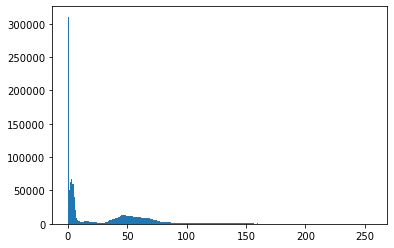

In [18]:
img = cv2.imread("1 no.jpeg")
import matplotlib.pyplot as plt
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [2]:
from PIL import Image, ImageFilter
image = Image.open(r"1 no.jpeg")
# Cropping the image
smol_image = image.crop((0, 0, 150, 150))
# Blurring on the cropped image
blurred_image = smol_image.filter(ImageFilter.GaussianBlur)
# Pasting the blurred image on the original image
image.paste(blurred_image, (0,0))
# Displaying the image
image.save('output.png')

In [3]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
    original = cv2.imread("1 no.jpeg")
    compressed = cv2.imread("output.png", 1)
    value = PSNR(original, compressed)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 62.138746913738885 dB


In [34]:
import cv2
import numpy as np
img = cv2.imread("1 no.jpeg",0)
equ = cv2.equalizeHist(img)

In [30]:
import cv2
import numpy as np
img = cv2.imread("sobelX.jpg")
equ = cv2.equalizeHist(img)

In [35]:
cv2.imshow("Equalise",np.hstack((img, equ)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
img = cv2.imread("1 no.jpeg") # Read image

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

cv2.imshow('original', img)
cv2.imshow("SobelX  SobelY",np.hstack((sobelx,sobely)))


# cv2.imshow('original', img)
# cv2.imshow('sobelx', sobelx)
# cv2.imshow('sobely', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [6]:
cv2.imshow('sobely', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()

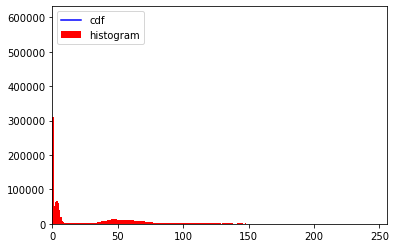

In [7]:
import matplotlib.pyplot as plt
hist,bins = np.histogram(sobely,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [9]:
img2 = cdf[img]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [10]:
cv2.imshow('',np.hstack(img2))
cv2.waitKey(0)
cv2.destroyAllWindows()


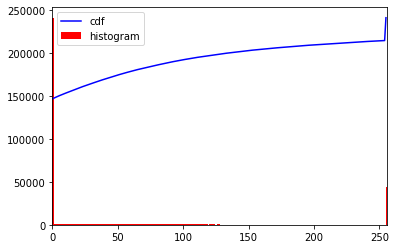

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sobelX.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [2]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [3]:
img2 = cdf[img]

In [4]:
cv2.imshow('',np.hstack(img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
equ = cv2.equalizeHist(highPass)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-inblc7p7\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [ ]:
equ = cv2.equalizeHist(img)

In [7]:
cv2.imshow("Equalise",np.hstack((img, equ)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img, equ)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

PSNR value is 29.02762633014561 dB


In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img, equ)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
#     original = cv2.imread("1 no.jpeg")
#     compressed = cv2.imread("output.png", 1)
    value = PSNR(img, equ)
    print(f"PSNR value is {value} dB")

if __name__ == "__main__":
    main()